<a href="https://colab.research.google.com/github/Ali-Nawab/Machine-Learning-Projects/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction 
In todays life, we are using Machine Learning algorithm for predicting the price of House based on the avialable features.Today we are using [California](https://www.kaggle.com/datasets/camnugent/california-housing-prices) Housing Price dataset and we will do necessary Data Analysis on it. After that we have to make prediction by using [Linear Regression Algorithm](https://www.ibm.com/topics/linear-regression#:~:text=Related%20solutions-,What%20is%20linear%20regression%3F,is%20called%20the%20independent%20variable.).



# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = fetch_california_housing()
X = data.data
y = data.target
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [ ]:
df = pd.DataFrame(X, columns = data.feature_names)
df['target'] = pd.DataFrame(y, columns = ['target'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df = df.round(2)

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23,4.53
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22,3.58
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24,3.52
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25,3.41
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25,3.42
...,...,...,...,...,...,...,...,...,...
20635,1.56,25.0,5.05,1.13,845.0,2.56,39.48,-121.09,0.78
20636,2.56,18.0,6.11,1.32,356.0,3.12,39.49,-121.21,0.77
20637,1.70,17.0,5.21,1.12,1007.0,2.33,39.43,-121.22,0.92
20638,1.87,18.0,5.33,1.17,741.0,2.12,39.43,-121.32,0.85


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870674,28.639486,5.429021,1.096681,1425.476744,3.070628,35.631861,-119.569704,2.068555
std,1.899853,12.585558,2.474190,0.473921,1132.462122,10.386010,2.135952,2.003532,1.153955
min,0.500000,1.000000,0.850000,0.330000,3.000000,0.690000,32.540000,-124.350000,0.150000
25%,2.560000,18.000000,4.440000,1.010000,787.000000,2.430000,33.930000,-121.800000,1.200000
50%,3.530000,29.000000,5.230000,1.050000,1166.000000,2.820000,34.260000,-118.490000,1.800000
75%,4.740000,37.000000,6.050000,1.100000,1725.000000,3.280000,37.710000,-118.010000,2.650000
max,15.000000,52.000000,141.910000,34.070000,35682.000000,1243.330000,41.950000,-114.310000,5.000000


In [ ]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

# Correlation between features

In [ ]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119031,0.326876,-0.062045,0.004840,0.018779,-0.079813,-0.015184,0.688087
HouseAge,-0.119031,1.000000,-0.153293,-0.077768,-0.296244,0.013196,0.011173,-0.108197,0.105662
AveRooms,0.326876,-0.153293,1.000000,0.847608,-0.072212,-0.004842,0.106378,-0.027530,0.151963
AveBedrms,-0.062045,-0.077768,0.847608,1.000000,-0.066167,-0.006227,0.069723,0.013321,-0.046670
Population,0.004840,-0.296244,-0.072212,-0.066167,1.000000,0.069859,-0.108785,0.099773,-0.024678
AveOccup,0.018779,0.013196,-0.004842,-0.006227,0.069859,1.000000,0.002367,0.002474,-0.023704
Latitude,-0.079813,0.011173,0.106378,0.069723,-0.108785,0.002367,1.000000,-0.924664,-0.144155
Longitude,-0.015184,-0.108197,-0.027530,0.013321,0.099773,0.002474,-0.924664,1.000000,-0.045967
target,0.688087,0.105662,0.151963,-0.046670,-0.024678,-0.023704,-0.144155,-0.045967,1.000000


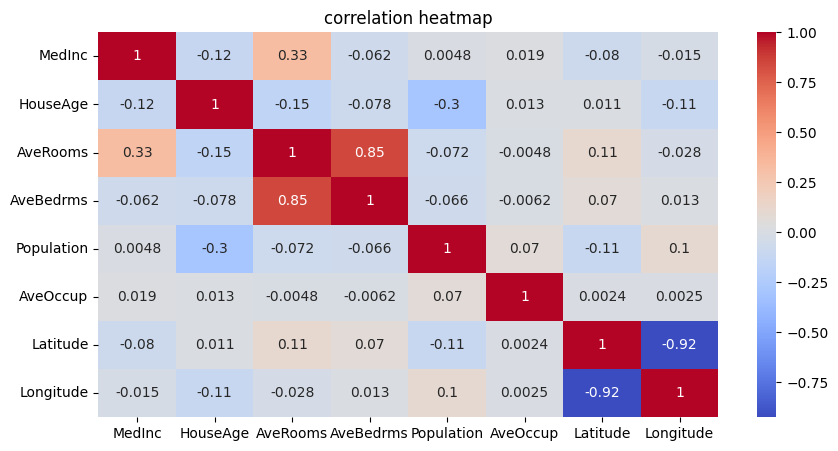

In [ ]:
df_new = df.drop(['target'], axis = 1)
correlation = df_new.corr()
plt.figure(figsize= (10, 5))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title("correlation heatmap")
plt.show()

In [ ]:
# Calculate the correlation coefficients
correlation_coeffs = df.corr()['target'].abs().sort_values(ascending=False)

# Print the correlation coefficients
print(correlation_coeffs)

target        1.000000
MedInc        0.688087
AveRooms      0.151963
Latitude      0.144155
HouseAge      0.105662
AveBedrms     0.046670
Longitude     0.045967
Population    0.024678
AveOccup      0.023704
Name: target, dtype: float64


In [ ]:
df.drop(['AveBedrms', 'Longitude'],axis = 1, inplace = True)

In [ ]:
df

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,target
0,8.33,41.0,6.98,322.0,2.56,37.88,4.53
1,8.30,21.0,6.24,2401.0,2.11,37.86,3.58
2,7.26,52.0,8.29,496.0,2.80,37.85,3.52
3,5.64,52.0,5.82,558.0,2.55,37.85,3.41
4,3.85,52.0,6.28,565.0,2.18,37.85,3.42
...,...,...,...,...,...,...,...
20635,1.56,25.0,5.05,845.0,2.56,39.48,0.78
20636,2.56,18.0,6.11,356.0,3.12,39.49,0.77
20637,1.70,17.0,5.21,1007.0,2.33,39.43,0.92
20638,1.87,18.0,5.33,741.0,2.12,39.43,0.85


## Outlier Detection & Removal

<Axes: xlabel='MedInc'>

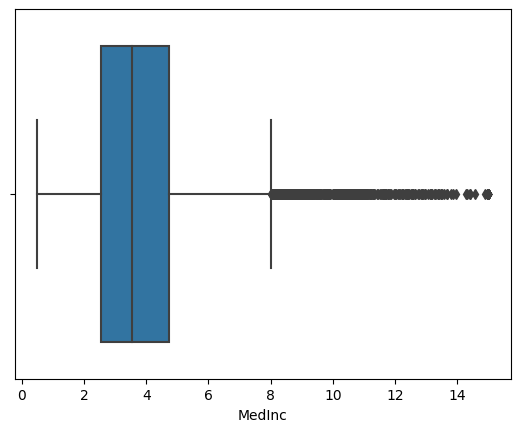

In [ ]:
sns.boxplot(x = df['MedInc'])

In [ ]:
med_inc = df['MedInc'].values
target = df['target'].values
print(med_inc.shape)

(20640,)


Filtered MedInc shape: (20246,)
Filtered target shape: (20246,)


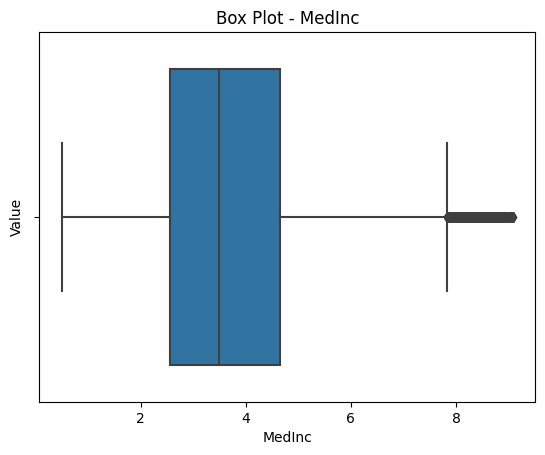

In [ ]:
# Sort the arrays
sorted_indices = np.argsort(med_inc)
med_inc_sorted = med_inc[sorted_indices]
y_sorted = target[sorted_indices]

q1, q3 = np.percentile(med_inc_sorted, [25, 75])
iqr = q3 - q1
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (2 * iqr)

# Remove outliers based on the lower and upper fences
filtered_indices = (med_inc_sorted >= lower_fence) & (med_inc_sorted <= upper_fence)
x = med_inc_sorted[filtered_indices]
Y = y_sorted[filtered_indices]

# Print the shapes of the filtered arrays
print("Filtered MedInc shape:", x.shape)
print("Filtered target shape:", Y.shape)

# Assuming sorted_med contains the filtered values
sns.boxplot(x = x)
plt.xlabel('MedInc')
plt.ylabel('Value')
plt.title('Box Plot - MedInc')
plt.show()


## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.33, random_state=4)
print(X_train.shape)

(13564,)


In [ ]:
X_test.shape

(6682,)

## Normalization of values

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train.reshape(-1, 1)) # mean, sigma.
X_train_normal = scaler.transform(X_train.reshape(-1, 1))
print(X_train_normal)
X_test_normal = scaler.transform(X_test.reshape(-1, 1))

[[ 1.60274608]
 [ 1.29972491]
 [-1.33908445]
 ...
 [ 1.00301668]
 [-0.36689153]
 [ 1.13558844]]


# Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train_normal, y_train)
y_pred = model.predict(X_test_normal)
print(model.coef_)
print(model.intercept_)
mse = mean_squared_error(y_test, y_pred)
print(mse)

[0.71085143]
2.0235196107342968
0.6665108402474925


In [ ]:
z = int(model.predict(X_test_normal[0].reshape(-1, 1)))
print(f"Dollar : {z * 1000000} $")

Dollar : 2000000 $


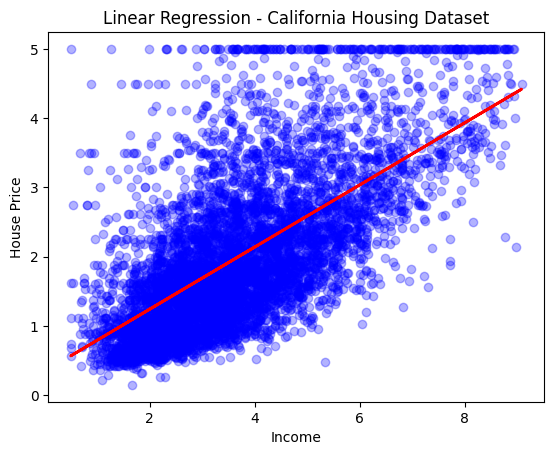

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha = 0.3)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Income')
plt.ylabel('House Price')
plt.title('Linear Regression - California Housing Dataset')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.6665108402474925
Mean Absolute Error (MAE): 0.6143632030133679


Mathematically Solved Regression Problems

https://www.brainkart.com/article/Solved-Example-Problems-for-Regression-Analysis_37036/

Outlier detection & removal

https://www.vedantu.com/maths/outliers

what is difference between Covariance and Correlation?

what is difference between Bias and Variance, and how to remove Bias and Variance?

what is Cross-Validation and how it helps to trained parameters of model?

what is difference between r2, adjusted r2, mse, mae, rmse?
